**ECO301 : Indian in the World Economy**

Importing all the pre-defined functions needed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# All the observations made here are written in the report
# Refer report for better understanding

Data was collected from http://udise.in/src.htm (maintained by the National University of Educational Planning and Administration, New Delhi)

Using the 2nd snippet we removed the telangana state from data because the data given was too inaccurate in many columns ( This is may be due to the State bifurcation happened in 2014).

Population of westbengal is listed 10 times more than the original in the DISE dataset. So necessary steps are taken to make it normal again in the next python code snippet.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/data_2016-17_statewise.csv") #reading the csv file
data = data[:-1]  #removing state telangana
data.loc[18,'TOTPOPULAT'] = data.loc[18,'TOTPOPULAT']/10 #correcting population of westbengal
data.head() # checking the dataset

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,TCHSTM3,TCHSTM4,TCHSTM5,TCHSTM6,TCHSTM7,TCHSTF1,TCHSTF2,TCHSTF3,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7
0,2016-17,1,JAMMU & KASHMIR,22,201,7276,1626,12549.0,20.05,16.01,23.71,883,7.4,11.9,68.74,58.01,78.26,222236,1452682,865656,14716,10141,494,134,95,2732,402,0,28714,13181,8027,106,134,92,1407,401,0,23348,1532,2114,...,244,7,91,1614,396,1293,2364,149,89,22,886,118,2348,3234,129,11,57,1005,283,1069,1195,183,35,27,550,55,1942,2918,36,7,32,756,116,1021,1419,19,42,13,373,23
1,2016-17,2,HIMACHAL PRADESH,12,125,10144,2466,6857.0,8.69,11.14,12.81,974,25.2,5.7,83.78,76.60,90.83,55673,588162,354221,11329,844,612,2065,1743,678,925,0,18196,10730,5,26,2065,1733,6,924,0,15489,598,839,...,134,412,1203,131,298,902,238,262,185,794,282,178,1618,231,331,623,2031,315,524,1174,608,584,199,983,756,259,3073,24,18,368,536,23,303,2204,44,30,99,288,55,148
2,2016-17,3,PUNJAB,22,146,13176,1783,27704.0,29.82,10.62,13.73,893,31.9,0.0,76.68,71.34,81.48,50362,2447062,1498066,14242,2561,2677,2685,2078,2748,1726,0,28717,13226,345,338,2678,1956,293,1688,0,20524,860,1956,...,4,2,3,1,2,10,13,14,3,6,6,0,2751,474,1088,776,2613,612,1226,4792,2363,3858,880,2757,3338,1257,6440,3,64,523,1743,15,1612,11078,29,246,579,2873,63,2159
3,2016-17,4,CHANDIGARH,1,20,85,20,1055.0,97.25,11.18,17.10,818,18.9,0.0,86.43,81.38,90.54,114,114473,67721,12,30,89,0,5,65,0,0,201,8,12,43,0,2,51,0,0,116,4,13,...,9,0,0,1,0,1,0,33,0,0,3,0,7,50,190,0,2,184,0,10,34,200,0,1,205,0,16,43,108,0,0,194,0,35,86,259,0,0,430,0
4,2016-17,5,UTTARAKHAND,13,95,11994,994,10117.0,21.54,13.14,19.17,963,18.8,2.9,79.63,70.70,88.33,53483,1123220,687598,15297,1754,520,3417,1608,171,908,0,23675,12595,17,47,2800,1250,9,796,0,17514,2451,1644,...,40,241,403,17,124,769,266,75,180,251,33,78,3861,834,235,1360,2451,133,754,3545,1281,312,612,729,116,283,7074,16,2,1785,577,2,374,7326,20,10,877,162,9,145


Filtering out some needed columns for coding.

In [ ]:
col_needed = ['STATNAME', 'DISTRICTS', 'TOTPOPULAT','SCHTOT','SCHTOTG','SCHTOTGR','SCHTOTPR','ENRTOT','ENRTOTG','ENRTOTGR', 
       'ENRTOTPR', 'TCHTOTG', 'TCHTOTP', 'SCLSTOT', 'STCHTOT', 'ROADTOT', 'SPLAYTOT', 'SWATTOT',  'SELETOT',] 
 
df = pd.DataFrame(data, columns=col_needed)
df.tail() #checking the dataset

,STATNAME,DISTRICTS,TOTPOPULAT,SCHTOT,SCHTOTG,SCHTOTGR,SCHTOTPR,ENRTOT,ENRTOTG,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,SCLSTOT,STCHTOT,ROADTOT,SPLAYTOT,SWATTOT,SELETOT
30,LAKSHADWEEP,1,64.0,41,41,32,0,7278,7278,5687,0,953,0,0,0,34,12,41,41
31,KERALA,14,33388.0,16466,4851,4004,7931,3976143,874991,693594,2122544,62754,170881,305,365,16004,12111,16415,15873
32,TAMIL NADU,30,72139.0,57992,38299,32841,10585,9108892,4157320,3162878,2130990,271455,290330,0,1105,57050,44957,57973,57585
33,PUDUCHERRY,4,1244.0,725,414,237,150,168731,47144,24241,48689,5086,7990,6,0,720,539,725,725
34,A & N ISLANDS,3,380.0,411,340,308,45,49145,35616,24234,5212,4402,1052,13,0,353,239,411,361


In [ ]:
data["DIFF_LIT"] = data["MALE_LIT"]-data["FEMALE_LIT"] # gender gap in literacy rate

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


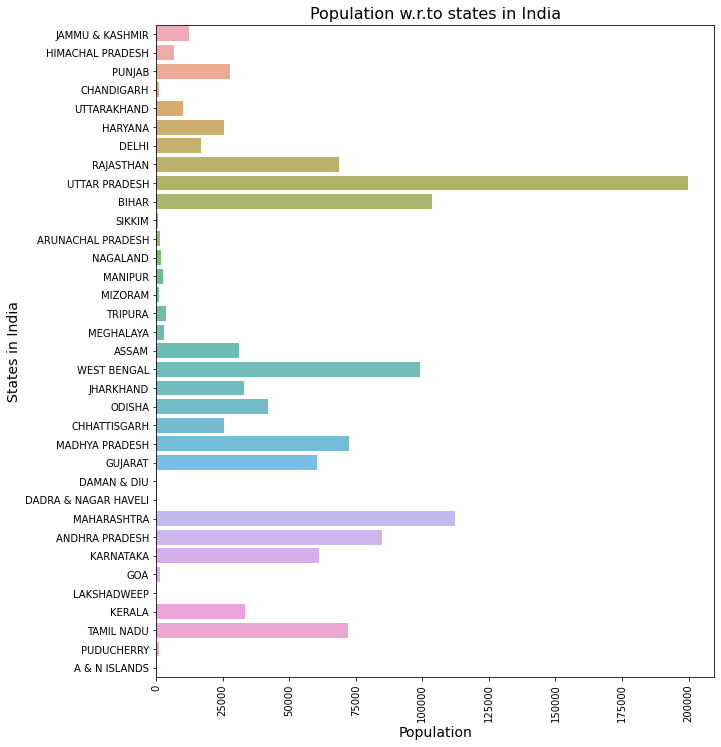

In [ ]:
 #plotting population graph
plt.figure(figsize=(10,12))
sns.barplot( df['TOTPOPULAT'],df['STATNAME'], alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Population', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Population w.r.to states in India", fontsize=16)
plt.show()

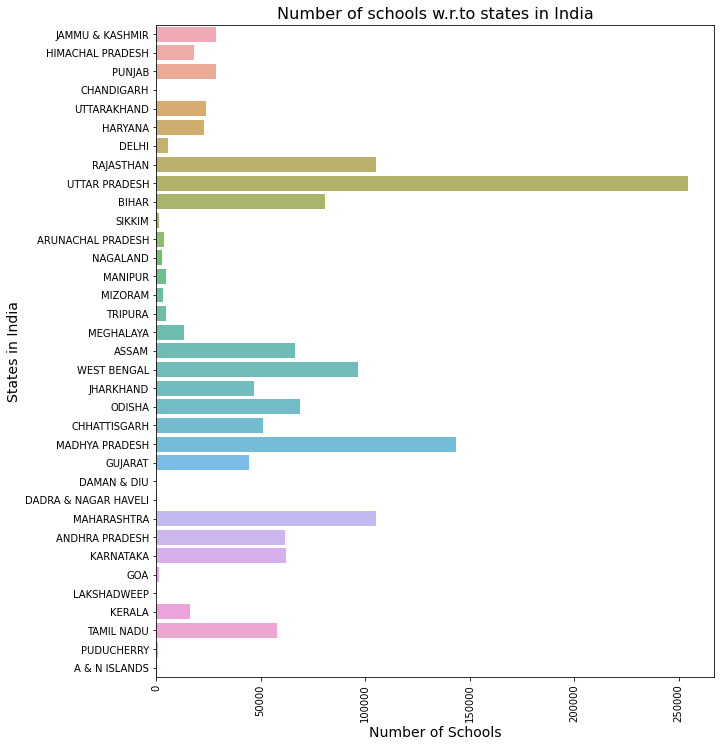

In [ ]:
#plotting graph for number of schools in each state
plt.figure(figsize=(10,12))
sns.barplot(x = df['SCHTOT'], y =df['STATNAME'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Number of Schools', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Number of schools w.r.to states in India", fontsize=16)
plt.show()

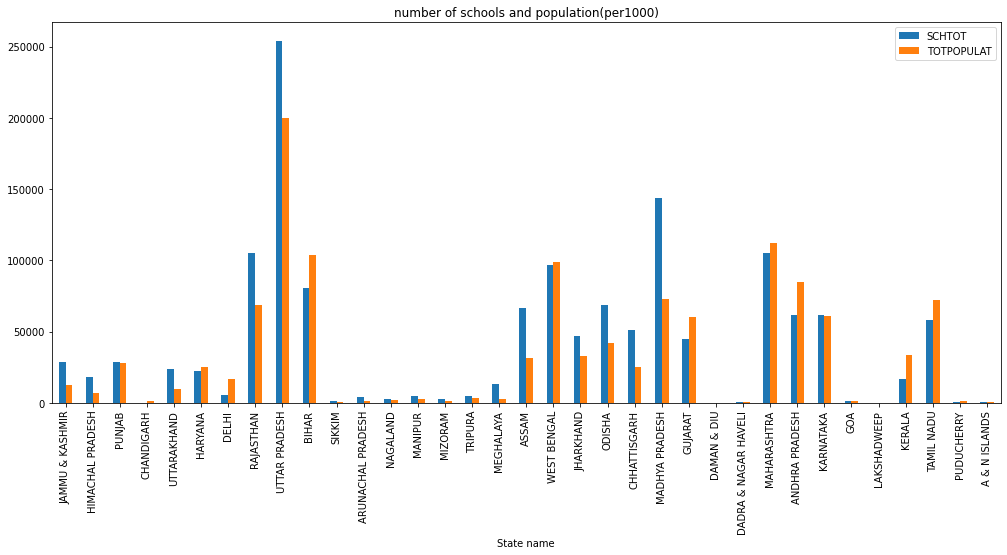

In [ ]:
#plotting Population (per 1000) vs Total number of schools side by side
df.plot(x="STATNAME", y=["SCHTOT", "TOTPOPULAT"], kind="bar",figsize = (17,7),xlabel = "State name",title = "number of schools and population(per1000)")

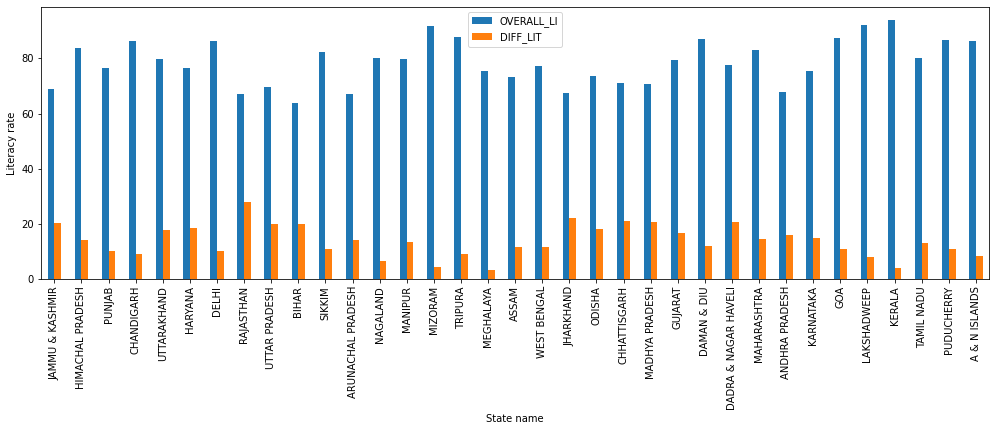

In [ ]:
# plotting Gender gap in literacy rate vs literacy rate of every state side by side
data.plot(x="STATNAME", y=["OVERALL_LI","DIFF_LIT"], kind="bar",figsize = (17,5),xlabel = "State name",ylabel= "Literacy rate")

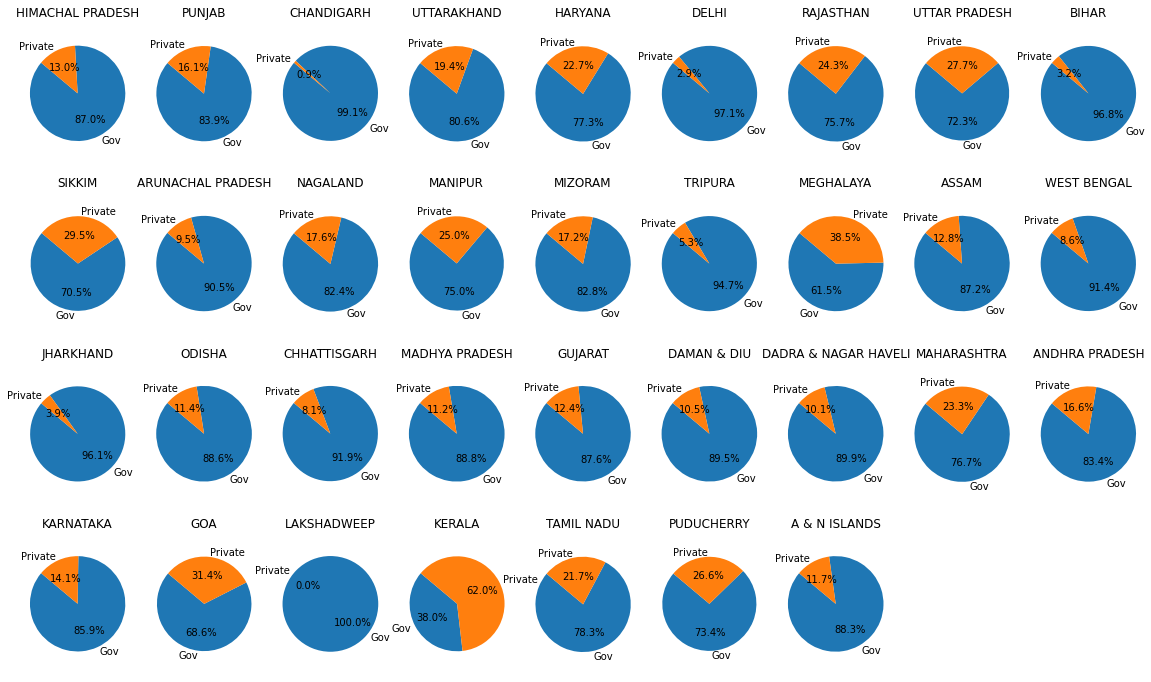

In [ ]:
#plotting Ratio of government and private schools in each state represented as a pie chart
plt.figure(figsize=(20,12))
for i in range(1,len(data)):
    plt.subplot(4,9,i)
    plt.title(df['STATNAME'][i])
    top = ['Gov','Private']
    uttar = data.loc[df['STATNAME'] == df['STATNAME'][i],:]
    value =[float(uttar['SCHTOTG']/uttar['SCHTOT'])*100,float(uttar['SCHTOTPR']/uttar['SCHTOT'])*100]
    plt.pie(value, labels=top, autopct='%1.1f%%',startangle=140)
    plt.axis('equal')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


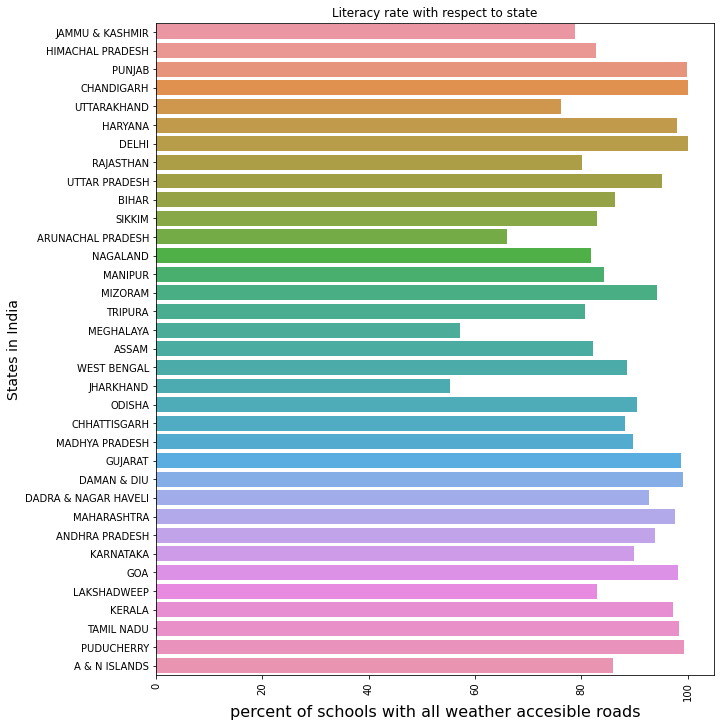

In [ ]:
#plotting schools with proper road facilities
data['Road facility with all weather accessibilty'] = data['ROADTOT']*100/data['SCHTOT']

plt.figure(figsize=(10,12))
sns.barplot(data['Road facility with all weather accessibilty'], data['STATNAME'],alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel("percent of schools with all weather accesible roads", fontsize=16)
plt.ylabel('States in India', fontsize=14)
 
plt.title('Literacy rate with respect to state')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


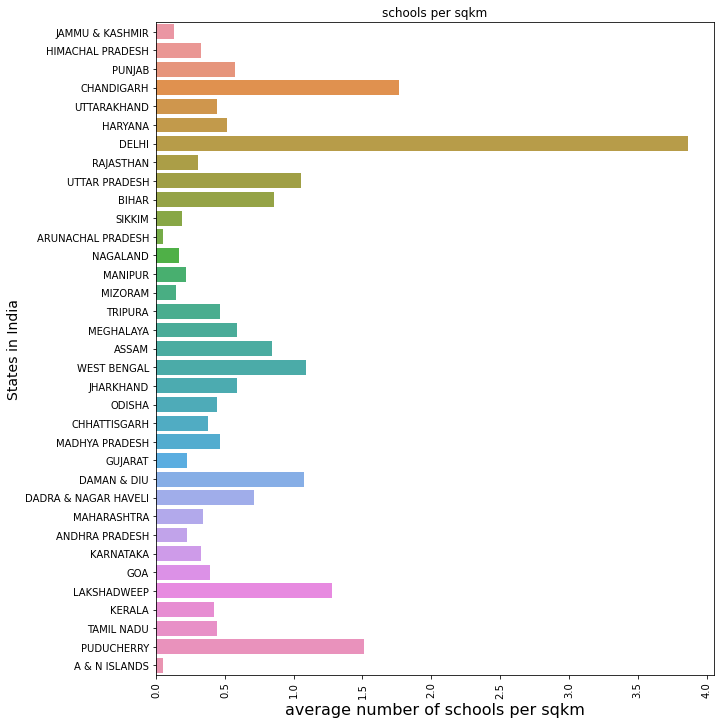

In [ ]:
#plotting Average number of schools  
 
data['avg_schools'] = data['SCHTOT']/data['AREA_SQKM']
plt.figure(figsize=(10,12))
sns.barplot(data['avg_schools'], data['STATNAME'],alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel("average number of schools per sqkm", fontsize=16)
plt.ylabel('States in India', fontsize=14)
 
plt.title('schools per sqkm')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


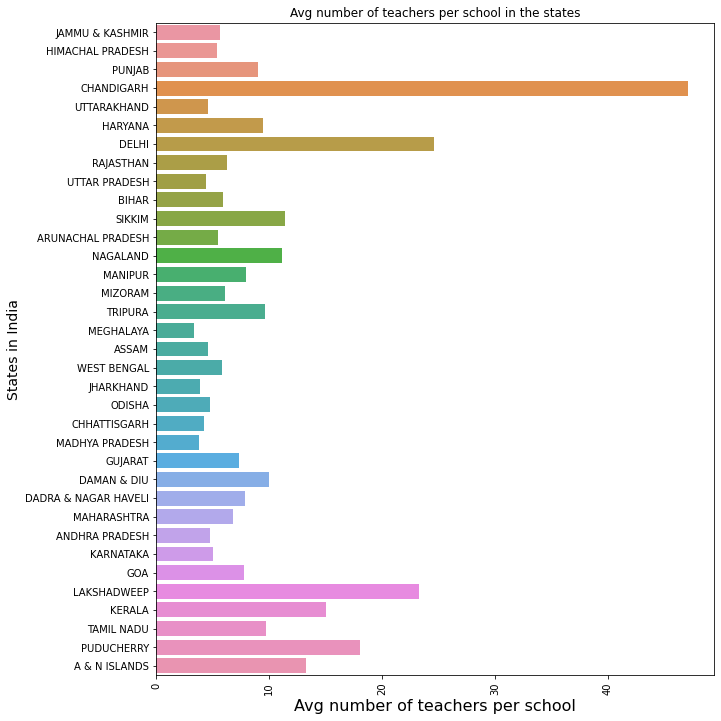

In [ ]:
# plotting Average number of teachers in a school
data['avgofteachersperschool'] = data['TCHTOT']/data['SCHTOT']
plt.figure(figsize=(10,12))
sns.barplot(data['avgofteachersperschool'], data['STATNAME'],alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel("Avg number of teachers per school", fontsize=16)
plt.ylabel('States in India', fontsize=14)
 
plt.title('Avg number of teachers per school in the states')
plt.show()

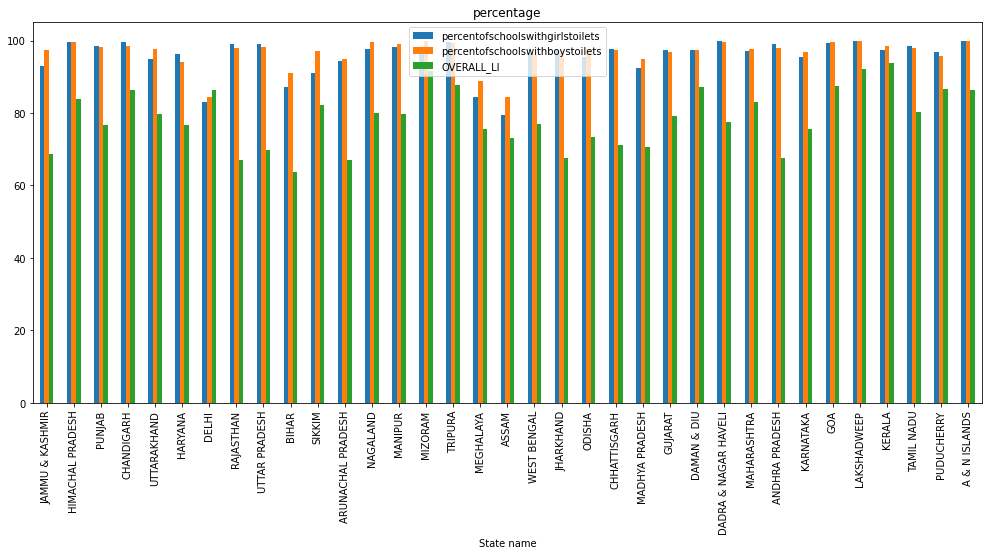

In [ ]:
 #plotting percentage of schools with toilet facility
data['percentofschoolswithgirlstoilets'] = data['SGTOILTOT']*100/data['SCHTOT']
data['percentofschoolswithboystoilets'] = data['SBTOILTOT']*100/data['SCHTOT']
data.plot(x="STATNAME", y=["percentofschoolswithgirlstoilets", "percentofschoolswithboystoilets","OVERALL_LI"], kind="bar",figsize = (17,7),xlabel = "State name",title = "percentage")

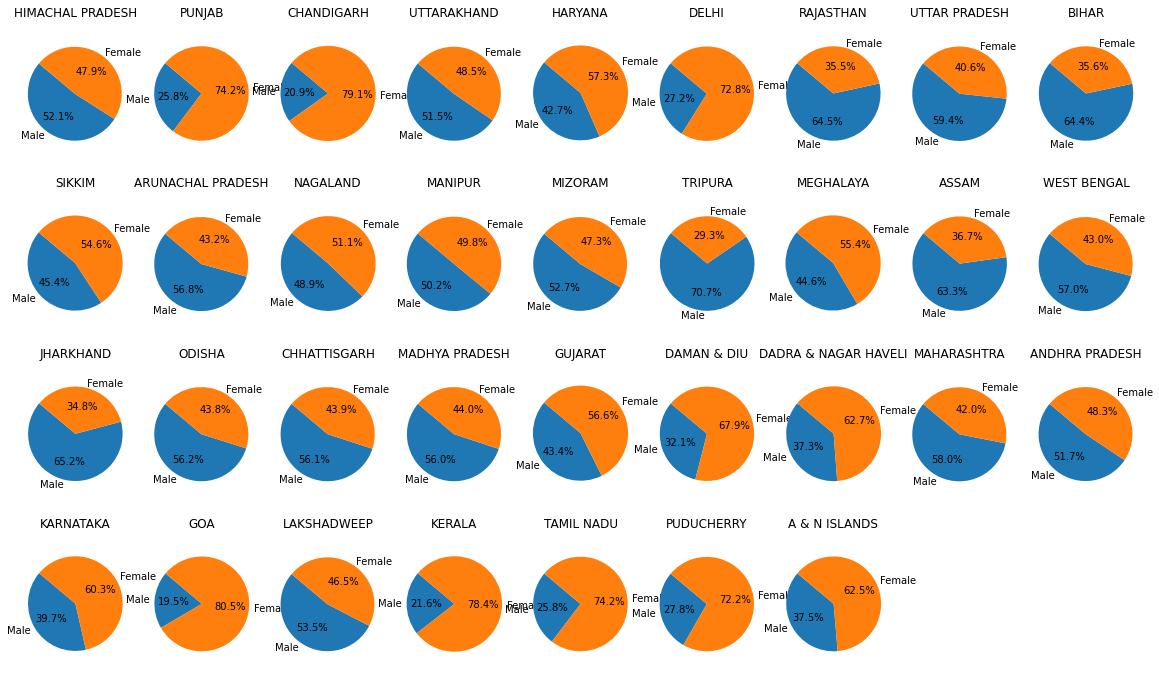

In [ ]:
#plotting the ratio of female and male teachers in all states
plt.figure(figsize=(20,12))
for i in range(1,len(data)):
    plt.subplot(4,9,i)
    plt.title(df['STATNAME'][i])
    top = ['Male','Female']
    uttar = data.loc[df['STATNAME'] == df['STATNAME'][i],:]
    value =[float((uttar['TCHTOT']-uttar['TCHFTOT'])/uttar['TCHTOT'])*100,float(uttar['TCHFTOT']/uttar['TCHTOT'])*100]
    plt.pie(value, labels=top, autopct='%1.1f%%',startangle=140)
    plt.axis('equal')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


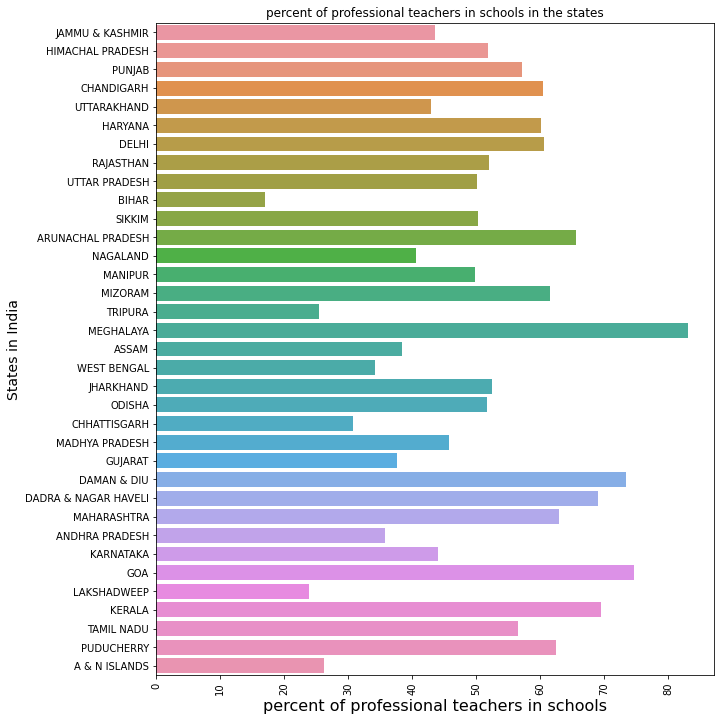

In [ ]:
#plotting percentage of professional teachers in all states
data['percentofprofessionalteachers'] = (data['PMTCH']+data['PFTCH']+data['PCFTCH']+data['PCMTCH'])/data['TCHTOT']
plt.figure(figsize=(10,12))
data['professionalteachers']=data['percentofprofessionalteachers']*100

sns.barplot(data['professionalteachers'], data['STATNAME'],alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel("percent of professional teachers in schools", fontsize=16)
plt.ylabel('States in India', fontsize=14)

plt.title('percent of professional teachers in schools in the states')
plt.show()

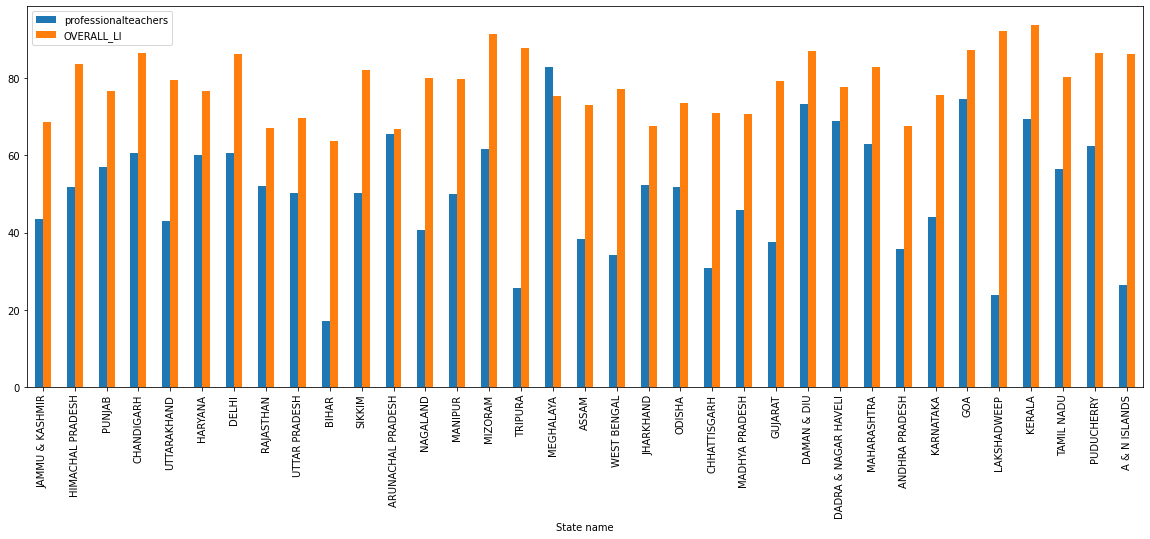

In [ ]:
#plotting literacy rate vs professional teachers side by side in all states
data.plot(x="STATNAME", y=["professionalteachers", "OVERALL_LI"], kind="bar",figsize = (20,7),xlabel = "State name")

In [ ]:
# Filtering out the top 3 and bottom 3 states with respect to Literacy rate
top_3=data.sort_values(by='OVERALL_LI', ascending=False).head(3)
bottom_3=data.sort_values(by='OVERALL_LI', ascending=True).head(3)
top_bottom=pd.concat([top_3, bottom_3], axis=0, sort=False)
top_bottom # we use this dataset for better understanding of the results

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,DIFF_LIT,Road facility with all weather accessibilty,avg_schools,avgofteachersperschool,percentofschoolswithgirlstoilets,percentofschoolswithboystoilets,percentofprofessionalteachers,professionalteachers
31,2016-17,32,KERALA,14,166,1905,1375,33388.0,24.76,9.95,44.86,1084,9.1,1.5,93.91,91.98,96.02,38863,2586473,1618453,8347,3368,1442,659,1026,1259,365,0,16466,2906,818,416,58,401,198,54,0,4851,4573,1998,...,39,332,389,35,5475,5877,5001,997,6742,1926,486,18479,17698,18526,1725,13554,10257,1729,2044,1967,304,278,652,134,161,7870,6002,820,740,2079,544,803,4.04,97.194218,0.423693,15.080165,97.321754,98.615329,0.694744,69.474447
30,2016-17,31,LAKSHADWEEP,1,3,10,9,64.0,41.86,11.00,6.23,946,0.0,94.8,92.28,88.25,96.11,32,5973,3805,17,12,4,1,5,2,0,0,41,17,12,4,1,5,2,0,0,41,0,0,...,9,112,19,0,0,1,8,0,5,0,0,0,0,1,1,2,0,0,63,35,2,0,14,19,0,54,20,2,0,3,9,0,7.86,82.926829,1.281250,23.243902,100.000000,100.000000,0.238195,23.819517
14,2016-17,15,MIZORAM,8,36,852,168,1091.0,40.42,15.17,22.78,975,0.1,94.4,91.58,89.40,93.72,21081,118153,51193,1536,433,0,1108,0,0,0,0,3077,1309,5,0,960,0,0,0,0,2274,213,417,...,3042,0,0,0,9,16,0,18,0,0,0,1,10,0,7,0,0,0,315,68,0,457,0,0,0,301,76,0,252,0,0,0,4.32,94.215145,0.145961,6.085798,97.790055,99.870003,0.615294,61.529424
9,2016-17,10,BIHAR,38,537,40865,5622,103805.0,8.36,17.90,25.07,916,15.9,1.3,63.82,53.33,73.39,94163,15017838,6730614,43578,32989,1124,279,89,2611,227,0,80897,42021,26302,648,253,59,2186,146,0,71615,538,2765,...,11,18,243,13,44588,78202,3695,724,296,9430,384,33236,45365,1505,351,96,4101,136,19270,28785,1221,223,32,3356,66,14636,17534,600,122,9,1477,32,20.06,86.417296,0.859117,5.959393,87.178758,90.971235,0.169835,16.983512
11,2016-17,12,ARUNACHAL PRADESH,20,100,2964,241,1383.0,16.48,14.66,25.92,920,0.0,68.8,66.95,59.57,73.69,83743,174523,77791,2304,1251,69,52,52,253,40,0,4021,2119,976,38,52,51,152,40,0,3428,158,261,...,203,204,1058,128,62,159,82,7,18,87,20,40,93,26,7,6,33,6,242,384,9,7,1,108,1,89,240,6,9,0,73,13,14.12,66.053221,0.048016,5.473017,94.454116,94.852027,0.655473,65.547326
7,2016-17,8,RAJASTHAN,33,302,41016,10666,68621.0,19.26,15.31,21.44,926,17.8,13.5,67.06,52.66,80.51,342239,8238091,4451853,40193,36807,16185,207,810,10988,246,0,105436,33433,20251,9419,194,364,4186,83,0,67930,4462,16231,...,102,160,1957,28,21541,57628,61462,42,2614,31844,443,10710,30424,21373,314,937,13558,240,5962,6322,1857,1,16,892,2,1935,2251,666,5,8,323,2,27.85,80.181342,0.308077,6.287141,98.943435,98.054744,0.519933,51.993314


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'literacy rate Difference')

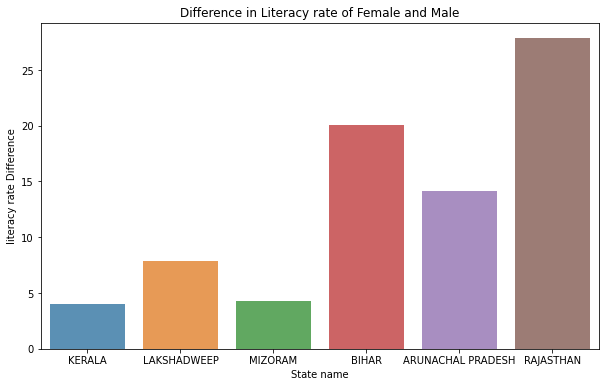

In [ ]:
# Plotting Difference in literacy rates of male and female in top_bottom dataset
top_bottom['Diff_Lit']=top_bottom['MALE_LIT']-top_bottom['FEMALE_LIT']
plt.figure(figsize=(10,6))
sns.barplot( top_bottom['STATNAME'],top_bottom['Diff_Lit'], alpha=0.8)
plt.title("Difference in Literacy rate of Female and Male")
plt.xlabel("State name")
plt.ylabel("literacy rate Difference")

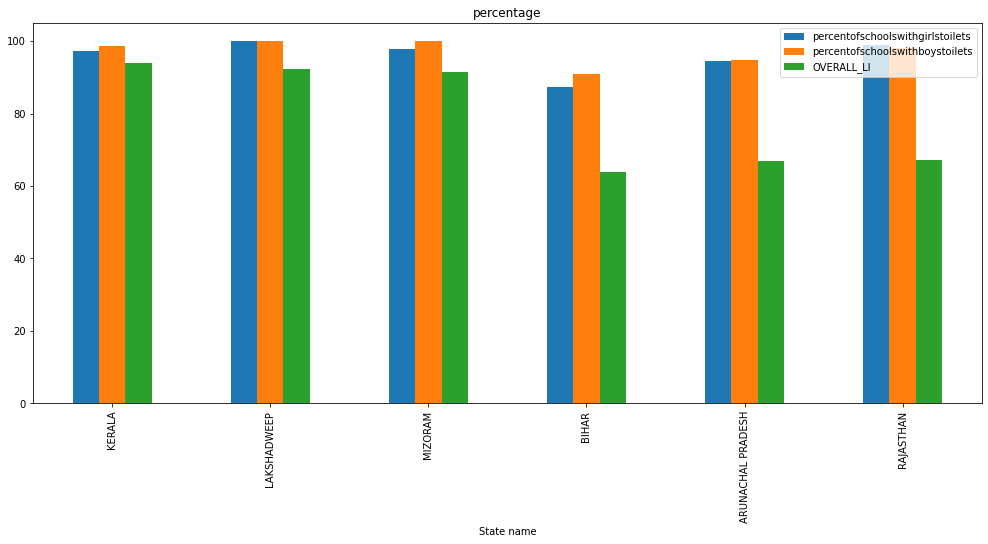

In [ ]:
#plotting percent of schools with girls and boys toilets vs literacy rates of states in top_bottom dataset
top_bottom.plot(x="STATNAME", y=["percentofschoolswithgirlstoilets", "percentofschoolswithboystoilets","OVERALL_LI"], kind="bar",figsize = (17,7),xlabel = "State name",title = "percentage")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of urban population')

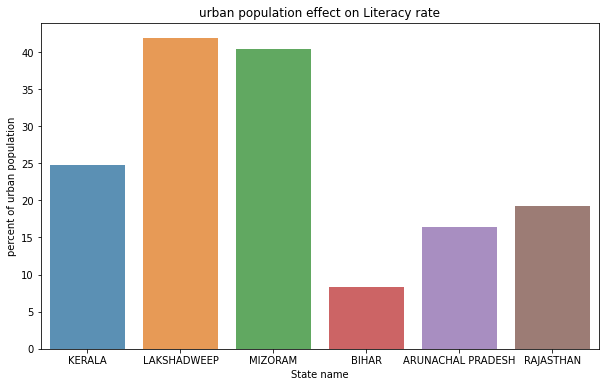

In [ ]:
# plotting percent of urban population in the top_bottom dataset
plt.figure(figsize=(10,6))
sns.barplot( top_bottom['STATNAME'],top_bottom['P_URB_POP'], alpha=0.8)
plt.title("urban population effect on Literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of urban population")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of schools not having a playground')

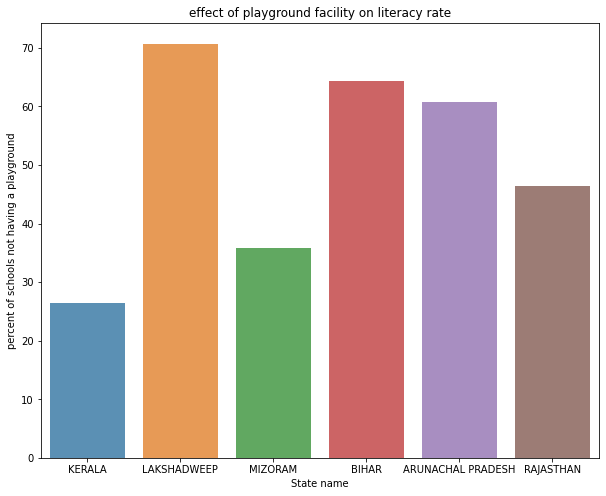

In [ ]:
#plotting percent of schools having no playground facility in the top_bottom dataset
plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],100-(top_bottom['SPLAYTOT']*100/top_bottom['SCHTOT']), alpha=0.8)
plt.title("effect of playground facility on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of schools not having a playground")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of schools with no proper road facility')

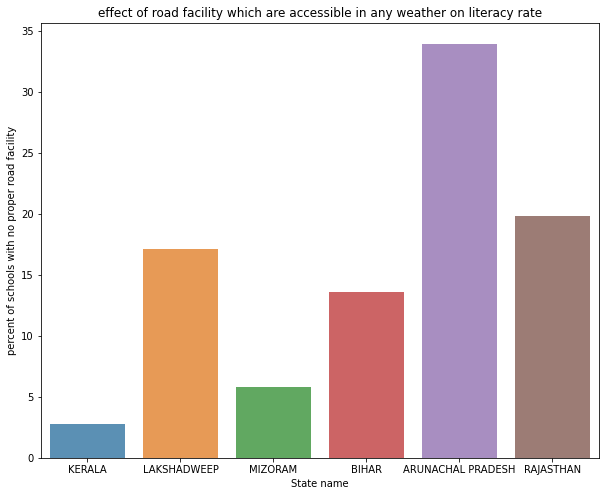

In [ ]:
#plotting percent of schools having proper road facility in top_bottom dataset
plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],100-(top_bottom['ROADTOT']*100/top_bottom['SCHTOT']), alpha=0.8)
plt.title("effect of road facility which are accessible in any weather on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of schools with no proper road facility")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of schools having electricity')

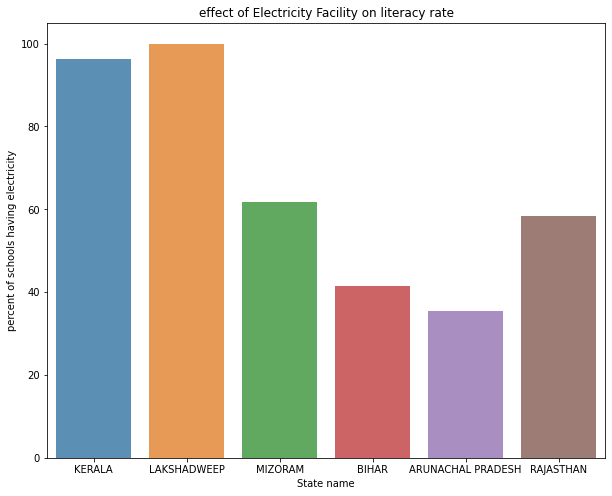

In [ ]:
#plotting percent of schools having electricity facility
plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],top_bottom['SELETOT']*100/top_bottom['SCHTOT'], alpha=0.8)
plt.title("effect of Electricity Facility on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of schools having electricity")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of schools having computers')

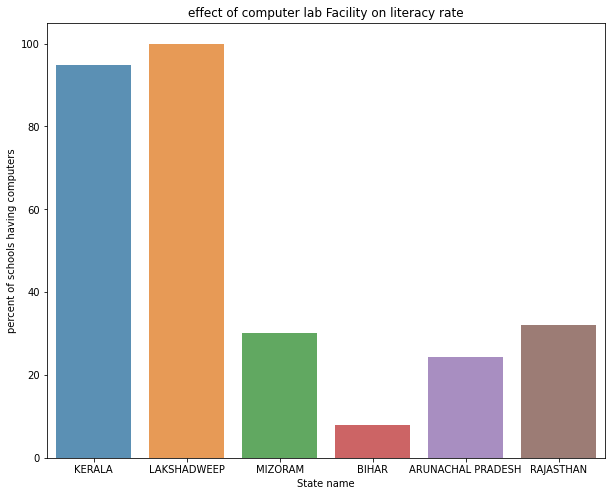

In [ ]:
#plotting the percent of schools having computer lab facility in top_bottom dataset
plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],top_bottom['SCOMPTOT']*100/top_bottom['SCHTOT'], alpha=0.8)
plt.title("effect of computer lab Facility on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of schools having computers")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of schools implementing midday meal programme')

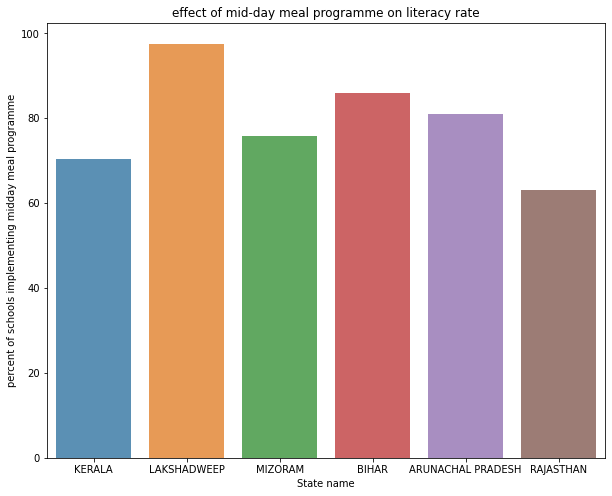

In [ ]:
#plotting the percent of schools mid-day meal facility in top_bottom dataset
plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],top_bottom['MDMTOT']*100/top_bottom['SCHTOT'], alpha=0.8)
plt.title("effect of mid-day meal programme on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of schools implementing midday meal programme")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of private schools')

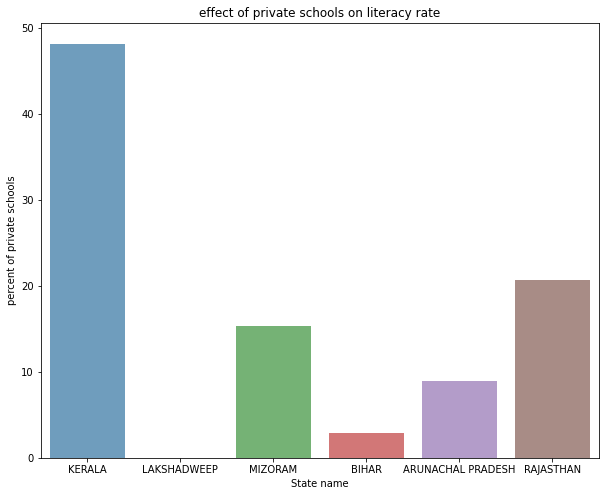

In [ ]:
#plotting the percent of private schools in states in top_bottom dataset
plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],top_bottom['SCHTOTPR']*100/top_bottom['SCHTOT'], alpha=0.7)
plt.title("effect of private schools on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of private schools")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Avg number of teachers')

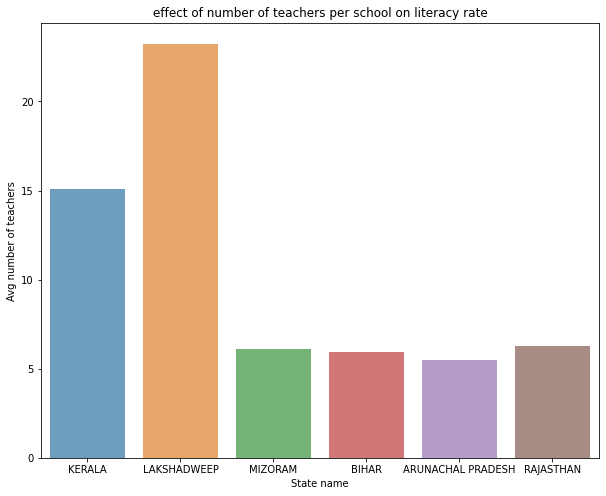

In [ ]:
#plotting the average number of teachers per school in top_bottom dataset
plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],top_bottom['avgofteachersperschool'], alpha=0.7)
plt.title("effect of number of teachers per school on literacy rate")
plt.xlabel("State name")
plt.ylabel("Avg number of teachers")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of schools')

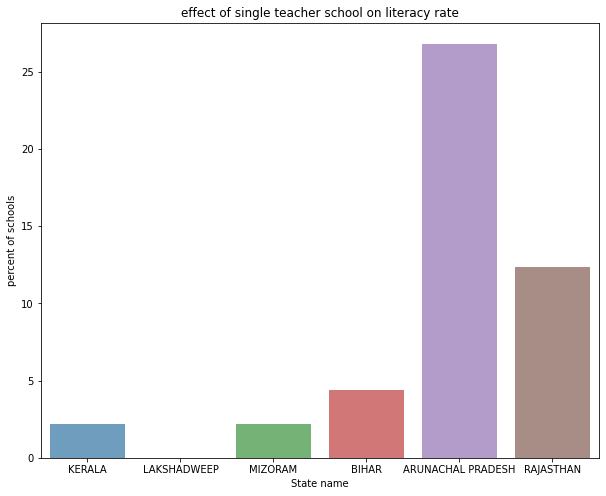

In [ ]:
#plotting the percent of schools with single teacher in top_bottom dataset

plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],top_bottom['STCHTOT']*100/top_bottom['SCHTOT'], alpha=0.7)
plt.title("effect of single teacher school on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of schools")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of schools')

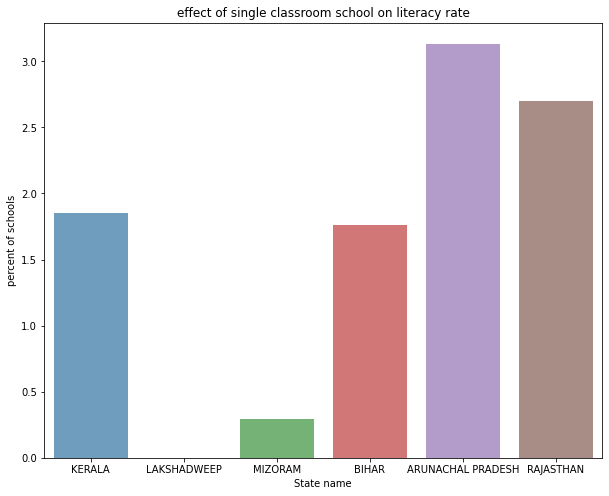

In [ ]:
#plotting the percent of schools with single classroom in top_bottom dataset

plt.figure(figsize=(10,8))
sns.barplot( top_bottom['STATNAME'],top_bottom['SCLSTOT']*100/top_bottom['SCHTOT'], alpha=0.7)
plt.title("effect of single classroom school on literacy rate")
plt.xlabel("State name")
plt.ylabel("percent of schools")

In [ ]:
#reading a new dataset from DISE data for calculating the dropout ratio of India and every state and Union territory
df2 = pd.read_csv("/content/drive/MyDrive/data/data_2016-17_statewise_dropout.csv")
df2 = df2[:-1] # excluding telangana
df2.head()

,STATCD,STATNAME,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1GA,SCH2GA,SCH3GA,SCH4GA,SCH5GA,SCH6GA,SCH7GA,SCH9GA,SCHTOTGA,SCHBOY1,SCHBOY2,SCHBOY3,SCHBOY4,SCHBOY5,SCHBOY6,SCHBOY7,SCHBOY9,SCHBOYTOT,SCHGIR1,SCHGIR2,SCHGIR3,SCHGIR4,SCHGIR5,SCHGIR6,SCHGIR7,SCHGIR9,SCHGIRTOT,ENR1,ENR2,...,TCHF5,TCHF6,TCHF7,TCHF9,TCHFTOT,TCHM1,TCHM2,TCHM3,TCHM4,TCHM5,TCHM6,TCHM7,ENRG1,ENRG2,ENRG3,ENRG4,ENRG5,ENRG6,ENRG7,ENRG9,ENRGTOT,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,OVERALL_LI
0,1,JAMMU & KASHMIR,14604,10153,486,133,95,2693,414,0,28578,13166,8026,98,133,92,1401,413,0,23329,14472,10034,477,35,93,2639,378,0,28128,14536,10067,480,127,92,2680,391,0,28373,405631,815729,...,600,18085,1590,0,70853,20647,38713,4068,114,1278,18496,3678,201825,395417,78574,4590,2450,195609,7734,0,886199,156602,129759,125487,122532,117644,109777,105242,103534,96707,143926,117978,114864,112619,107642,100578,95389,93203,84336,68.74
1,2,HIMACHAL PRADESH,11327,798,565,2132,1634,684,884,0,18024,10716,5,24,2131,1623,7,880,0,15386,11314,798,562,2126,1594,684,874,0,17952,11311,798,563,2131,1613,681,884,0,17981,346078,67356,...,9973,5790,2070,0,44864,15377,1955,3309,5610,17206,2504,4040,174209,29343,77429,33110,67009,47972,23645,0,452717,61885,60505,59552,59349,62646,64356,65577,64179,67976,56914,56249,54495,53153,56365,58336,59576,57629,58574,83.78
2,3,PUNJAB,14371,2582,2593,2864,1754,2743,1869,0,28776,13315,358,490,2862,1734,337,1860,0,20956,14256,2577,2575,2840,1553,2739,1787,0,28327,14263,2582,2589,2857,1659,2740,1841,0,28531,1111145,314849,...,21647,33952,11718,0,185000,15191,3154,12629,5277,14941,5586,8692,537759,135915,470503,96086,144666,289141,113094,0,1787164,277323,271892,265625,269057,275450,281125,269871,264932,260047,232771,227494,220161,223438,225372,229697,219214,209017,195256,76.68
3,4,CHANDIGARH,12,29,85,0,5,70,0,0,201,7,12,47,0,3,53,0,0,122,12,29,82,0,5,70,0,0,198,12,29,84,0,5,70,0,0,200,3437,12866,...,179,2116,0,0,7345,28,150,1023,0,55,708,0,1565,6026,37830,0,467,27242,0,0,73130,8298,9362,10055,10824,11119,11623,11703,11807,12842,7390,8420,9019,9159,9584,10019,10051,9488,9737,86.43
4,5,UTTARAKHAND,15497,1584,487,3433,1600,164,895,0,23660,12605,25,80,2983,1504,14,833,0,18044,15484,1583,463,3332,1462,160,833,0,23317,15483,1581,484,3408,1515,161,882,0,23514,714095,310532,...,6114,1314,2026,0,51649,19627,4254,2671,7674,18141,618,4740,352019,132706,113492,83982,75680,21291,32523,71,811764,128768,117729,116062,113433,113063,106463,103791,101600,101104,113062,104943,104058,102335,101755,96896,95073,93642,90991,79.63


In [ ]:
# preparing the data to calculate India's dropout rate with respect to the class grade
df2['C9_TOTAL'] = df2.loc[:,'C9_B'] + df2.loc[:,'C9_G']
df2['C8_TOTAL'] = df2.loc[:,'C8_B'] + df2.loc[:,'C8_G']
df2['C7_TOTAL'] = df2.loc[:,'C7_B'] + df2.loc[:,'C7_G']
df2['C6_TOTAL'] = df2.loc[:,'C6_B'] + df2.loc[:,'C6_G']
df2['C5_TOTAL'] = df2.loc[:,'C5_B'] + df2.loc[:,'C5_G']
df2['C4_TOTAL'] = df2.loc[:,'C4_B'] + df2.loc[:,'C4_G']
df2['C3_TOTAL'] = df2.loc[:,'C3_B'] + df2.loc[:,'C3_G']
df2['C2_TOTAL'] = df2.loc[:,'C2_B'] + df2.loc[:,'C2_G']
df2['C1_TOTAL'] = df2.loc[:,'C1_B'] + df2.loc[:,'C1_G']


In [ ]:
dropout_data = []
dropout_8to9 = (sum(df2['C8_TOTAL'])-sum(df2['C9_TOTAL']))/sum(df2['C8_TOTAL'])
dropout_data.append(dropout_8to9)
dropout_7to8 = (sum(df2['C7_TOTAL'])-sum(df2['C8_TOTAL']))/sum(df2['C7_TOTAL'])
dropout_data.append(dropout_7to8)
dropout_6to7 = (sum(df2['C6_TOTAL'])-sum(df2['C7_TOTAL']))/sum(df2['C6_TOTAL'])
dropout_data.append(dropout_6to7)
dropout_5to6 = (sum(df2['C5_TOTAL'])-sum(df2['C6_TOTAL']))/sum(df2['C5_TOTAL'])
dropout_data.append(dropout_5to6)
dropout_4to5 = (sum(df2['C4_TOTAL'])-sum(df2['C5_TOTAL']))/sum(df2['C4_TOTAL'])
dropout_data.append(dropout_4to5)
dropout_3to4 = (sum(df2['C3_TOTAL'])-sum(df2['C4_TOTAL']))/sum(df2['C3_TOTAL'])
dropout_data.append(dropout_3to4)
dropout_2to3 = (sum(df2['C2_TOTAL'])-sum(df2['C3_TOTAL']))/sum(df2['C2_TOTAL'])
dropout_data.append(dropout_2to3)
dropout_1to2 = (sum(df2['C1_TOTAL'])-sum(df2['C2_TOTAL']))/sum(df2['C1_TOTAL'])
dropout_data.append(dropout_1to2)

dropout_data = pd.DataFrame(data = dropout_data)
dropout_data['classes'] = ['9','8','7','6','5','4','3','2']
dropout_data.columns = ['Dropout rate','class grade']
dropout_data

,Dropout rate,class grade
0,0.069185,9
1,0.024936,8
2,0.019809,7
3,0.081892,6
4,0.024269,5
5,-0.009175,4
6,0.014658,3
7,0.048025,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percent of people droppedout')

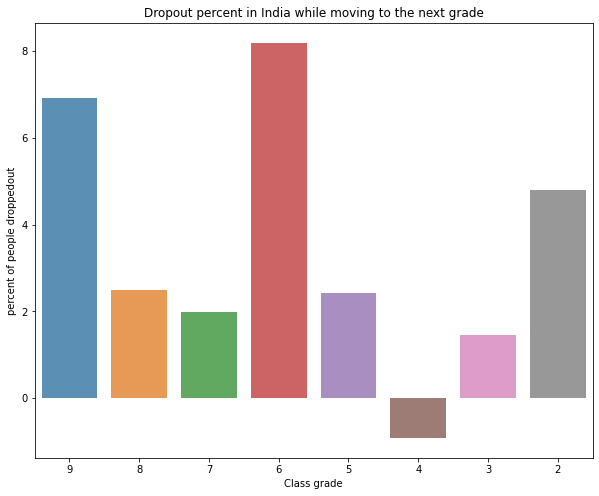

In [ ]:
#plotting the dropout rate in India according to the class grade from 2 to 9
plt.figure(figsize=(10,8))
sns.barplot(dropout_data['class grade'],dropout_data['Dropout rate']*100, alpha=0.8)
plt.title("Dropout percent in India while moving to the next grade")
plt.xlabel("Class grade")
plt.ylabel("percent of people droppedout")

In [ ]:
# preparing data to calculate the average dropout rate of every state in a year
df2['dropout_8to9_state'] = (df2['C8_TOTAL']-df2['C9_TOTAL'])*100/df2['C8_TOTAL']
df2['dropout_7to8_state'] = (df2['C7_TOTAL']-df2['C8_TOTAL'])*100/df2['C7_TOTAL']
df2['dropout_6to7_state'] = (df2['C6_TOTAL']-df2['C7_TOTAL'])*100/df2['C6_TOTAL']
df2['dropout_5to6_state'] = (df2['C5_TOTAL']-df2['C6_TOTAL'])*100/df2['C5_TOTAL']
df2['dropout_4to5_state'] = (df2['C4_TOTAL']-df2['C5_TOTAL'])*100/df2['C4_TOTAL']
df2['dropout_3to4_state'] = (df2['C3_TOTAL']-df2['C4_TOTAL'])*100/df2['C3_TOTAL']
df2['dropout_2to3_state'] = (df2['C2_TOTAL']-df2['C3_TOTAL'])*100/df2['C2_TOTAL']
df2['dropout_1to2_state'] = (df2['C1_TOTAL']-df2['C2_TOTAL'])*100/df2['C1_TOTAL']
df2['AVG_DROP_OUT'] = (df2['dropout_8to9_state']+df2['dropout_7to8_state']+df2['dropout_6to7_state']+df2['dropout_5to6_state'] +df2['dropout_4to5_state']+df2['dropout_3to4_state']+df2['dropout_2to3_state']+df2['dropout_1to2_state'])/8
df2.head()

,STATCD,STATNAME,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1GA,SCH2GA,SCH3GA,SCH4GA,SCH5GA,SCH6GA,SCH7GA,SCH9GA,SCHTOTGA,SCHBOY1,SCHBOY2,SCHBOY3,SCHBOY4,SCHBOY5,SCHBOY6,SCHBOY7,SCHBOY9,SCHBOYTOT,SCHGIR1,SCHGIR2,SCHGIR3,SCHGIR4,SCHGIR5,SCHGIR6,SCHGIR7,SCHGIR9,SCHGIRTOT,ENR1,ENR2,...,ENRG7,ENRG9,ENRGTOT,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,OVERALL_LI,C9_TOTAL,C8_TOTAL,C7_TOTAL,C6_TOTAL,C5_TOTAL,C4_TOTAL,C3_TOTAL,C2_TOTAL,C1_TOTAL,dropout_8to9_state,dropout_7to8_state,dropout_6to7_state,dropout_5to6_state,dropout_4to5_state,dropout_3to4_state,dropout_2to3_state,dropout_1to2_state,AVG_DROP_OUT
0,1,JAMMU & KASHMIR,14604,10153,486,133,95,2693,414,0,28578,13166,8026,98,133,92,1401,413,0,23329,14472,10034,477,35,93,2639,378,0,28128,14536,10067,480,127,92,2680,391,0,28373,405631,815729,...,7734,0,886199,156602,129759,125487,122532,117644,109777,105242,103534,96707,143926,117978,114864,112619,107642,100578,95389,93203,84336,68.74,181043,196737,200631,210355,225286,235151,240351,247737,300528,7.977147,1.940877,4.622662,6.627576,4.195177,2.163503,2.981388,17.566084,6.009301
1,2,HIMACHAL PRADESH,11327,798,565,2132,1634,684,884,0,18024,10716,5,24,2131,1623,7,880,0,15386,11314,798,562,2126,1594,684,874,0,17952,11311,798,563,2131,1613,681,884,0,17981,346078,67356,...,23645,0,452717,61885,60505,59552,59349,62646,64356,65577,64179,67976,56914,56249,54495,53153,56365,58336,59576,57629,58574,83.78,126550,121808,125153,122692,119011,112502,114047,116754,118799,-3.893012,2.672729,-2.005836,-3.092991,-5.785675,1.354705,2.318550,1.721395,-0.838767
2,3,PUNJAB,14371,2582,2593,2864,1754,2743,1869,0,28776,13315,358,490,2862,1734,337,1860,0,20956,14256,2577,2575,2840,1553,2739,1787,0,28327,14263,2582,2589,2857,1659,2740,1841,0,28531,1111145,314849,...,113094,0,1787164,277323,271892,265625,269057,275450,281125,269871,264932,260047,232771,227494,220161,223438,225372,229697,219214,209017,195256,76.68,455303,473949,489085,510822,500822,492495,485786,499386,510094,3.934179,3.094759,4.255298,-1.996717,-1.690779,-1.381061,2.723344,2.099221,1.379780
3,4,CHANDIGARH,12,29,85,0,5,70,0,0,201,7,12,47,0,3,53,0,0,122,12,29,82,0,5,70,0,0,198,12,29,84,0,5,70,0,0,200,3437,12866,...,0,0,73130,8298,9362,10055,10824,11119,11623,11703,11807,12842,7390,8420,9019,9159,9584,10019,10051,9488,9737,86.43,22579,21295,21754,21642,20703,19983,19074,17782,15688,-6.029584,2.109957,-0.517512,-4.535575,-3.603063,-4.765650,-7.265774,-13.347782,-4.744373
4,5,UTTARAKHAND,15497,1584,487,3433,1600,164,895,0,23660,12605,25,80,2983,1504,14,833,0,18044,15484,1583,463,3332,1462,160,833,0,23317,15483,1581,484,3408,1515,161,882,0,23514,714095,310532,...,32523,71,811764,128768,117729,116062,113433,113063,106463,103791,101600,101104,113062,104943,104058,102335,101755,96896,95073,93642,90991,79.63,192095,195242,198864,203359,214818,215768,220120,222672,241830,1.611846,1.821345,2.210377,5.334283,0.440288,1.977103,1.146080,7.922094,2.807927


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


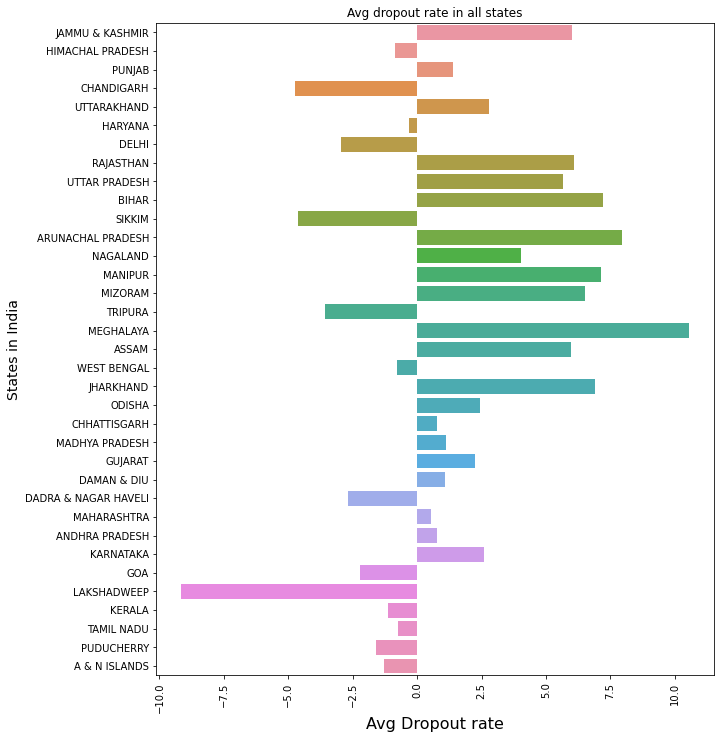

In [ ]:
##plotting the average dropout rate of all the states in India
plt.figure(figsize=(10,12))
sns.barplot(df2['AVG_DROP_OUT'], df2['STATNAME'],alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel("Avg Dropout rate", fontsize=16)
plt.ylabel('States in India', fontsize=14)
 
plt.title('Avg dropout rate in all states')
plt.show()

In [ ]:
# Filtering out the top 3 and bottom 3 states with respect to Dropout rate
top_3_new = df2.sort_values(by='AVG_DROP_OUT', ascending=False).head(3)
bottom_3_new = df2.sort_values(by='AVG_DROP_OUT', ascending=True).head(3)
top_bottom_drop = pd.concat([top_3_new, bottom_3_new], axis=0, sort=False)
top_bottom_drop # we use this dataset for better understanding of the results

,STATCD,STATNAME,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1GA,SCH2GA,SCH3GA,SCH4GA,SCH5GA,SCH6GA,SCH7GA,SCH9GA,SCHTOTGA,SCHBOY1,SCHBOY2,SCHBOY3,SCHBOY4,SCHBOY5,SCHBOY6,SCHBOY7,SCHBOY9,SCHBOYTOT,SCHGIR1,SCHGIR2,SCHGIR3,SCHGIR4,SCHGIR5,SCHGIR6,SCHGIR7,SCHGIR9,SCHGIRTOT,ENR1,ENR2,...,ENRG7,ENRG9,ENRGTOT,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,OVERALL_LI,C9_TOTAL,C8_TOTAL,C7_TOTAL,C6_TOTAL,C5_TOTAL,C4_TOTAL,C3_TOTAL,C2_TOTAL,C1_TOTAL,dropout_8to9_state,dropout_7to8_state,dropout_6to7_state,dropout_5to6_state,dropout_4to5_state,dropout_3to4_state,dropout_2to3_state,dropout_1to2_state,AVG_DROP_OUT
16,17,MEGHALAYA,9362,183,29,3414,31,107,151,0,13277,7940,21,15,3189,28,22,130,0,11345,9351,183,26,3369,28,107,144,0,13208,9355,182,28,3408,31,105,150,0,13259,492670,28805,...,12872,485,393293,73435,57958,53655,47614,41870,40211,35253,32324,27487,70941,56087,53391,48690,44089,43739,39616,36740,30880,75.48,58367,69064,74869,83950,85959,96304,107046,114045,144376,15.488532,7.753543,10.817153,2.337161,10.742025,10.034938,6.137051,21.008339,10.539843
11,12,ARUNACHAL PRADESH,2363,1216,67,50,53,224,39,0,4012,2200,976,47,50,52,160,39,0,3524,2355,1197,67,2,53,220,28,0,3922,2363,1211,66,50,53,224,39,0,4006,83247,153355,...,2170,0,159128,29655,23955,21430,19573,18573,17513,16391,16240,15192,27569,22965,20409,18930,18171,17988,16844,16252,13959,66.95,29151,32492,33235,35501,36744,38503,41839,46920,57224,10.282531,2.235595,6.382919,3.382865,4.568475,7.973422,10.829071,18.006431,7.957664
9,10,BIHAR,43405,32912,938,292,92,2281,246,0,80166,41837,26914,494,285,78,1859,165,0,71632,43284,32733,929,285,74,2265,201,0,79771,43370,32872,934,283,86,2265,242,0,80052,7106842,14250646,...,18230,0,11667789,1726083,1607854,1672580,1587707,1580765,1263129,1192112,1133766,893323,1666299,1586682,1632816,1552067,1557235,1286962,1215344,1170384,912563,63.82,1805886,2304150,2407456,2550091,3138000,3139774,3305396,3194536,3392382,21.624634,4.291086,5.593330,18.735150,0.056501,5.010655,-3.470301,5.832067,7.209140
30,31,LAKSHADWEEP,17,13,4,1,5,1,0,0,41,17,13,4,1,5,1,0,0,41,17,13,4,1,5,1,0,0,41,17,13,4,1,5,1,0,0,41,2265,2969,...,0,0,3724,517,432,281,488,549,553,511,521,725,410,404,280,500,547,506,510,567,681,92.28,1406,1088,1021,1059,1096,988,561,836,927,-29.227941,-6.562194,3.588291,3.375912,-10.931174,-76.114082,32.894737,9.816613,-9.144980
3,4,CHANDIGARH,12,29,85,0,5,70,0,0,201,7,12,47,0,3,53,0,0,122,12,29,82,0,5,70,0,0,198,12,29,84,0,5,70,0,0,200,3437,12866,...,0,0,73130,8298,9362,10055,10824,11119,11623,11703,11807,12842,7390,8420,9019,9159,9584,10019,10051,9488,9737,86.43,22579,21295,21754,21642,20703,19983,19074,17782,15688,-6.029584,2.109957,-0.517512,-4.535575,-3.603063,-4.765650,-7.265774,-13.347782,-4.744373
10,11,SIKKIM,706,345,80,1,7,136,4,0,1279,489,188,69,1,7,115,4,0,873,705,345,77,1,7,136,3,0,1274,628,342,79,1,5,136,4,0,1195,20105,34380,...,351,0,51351,6186,5835,6107,6844,7227,7816,6951,6980,7749,5312,4998,5451,6088,6759,8010,7393,7340,8366,82.20,16115,14320,14344,15826,13986,12932,11558,10833,11498,-12.534916,0.167317,9.364337,-13.156013,-8.150325,-11.887870,-6.692514,5.783615,-4.638296


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Rate of Dropouts')

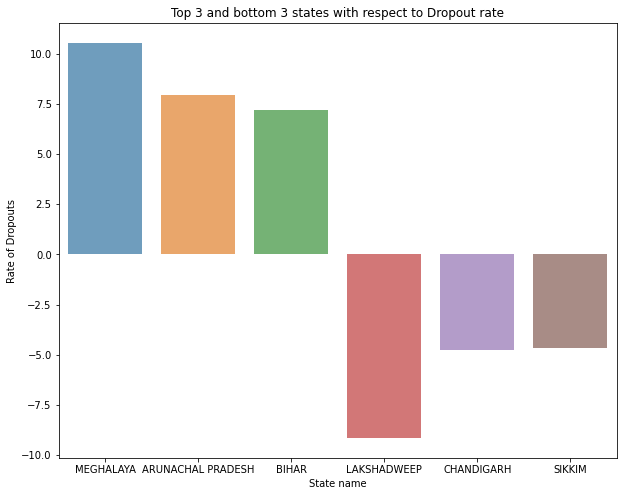

In [ ]:
#plotting the percent of schools with single classroom in top_bottom_drop dataset
plt.figure(figsize=(10,8))
sns.barplot( top_bottom_drop['STATNAME'],top_bottom_drop['AVG_DROP_OUT'], alpha=0.7)
plt.title("Top 3 and bottom 3 states with respect to Dropout rate")
plt.xlabel("State name")
plt.ylabel("Rate of Dropouts")

In [ ]:
# Filtering out the top 3 and bottom 3 states with respect to Literacy rate
top_3_LI = df2.sort_values(by='OVERALL_LI', ascending=False).head(3)
bottom_3_LI = df2.sort_values(by='OVERALL_LI', ascending=True).head(3)
top_bottom_LI = pd.concat([top_3_LI, bottom_3_LI], axis=0, sort=False)
top_bottom_LI # we use this dataset for better understanding of the results

,STATCD,STATNAME,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1GA,SCH2GA,SCH3GA,SCH4GA,SCH5GA,SCH6GA,SCH7GA,SCH9GA,SCHTOTGA,SCHBOY1,SCHBOY2,SCHBOY3,SCHBOY4,SCHBOY5,SCHBOY6,SCHBOY7,SCHBOY9,SCHBOYTOT,SCHGIR1,SCHGIR2,SCHGIR3,SCHGIR4,SCHGIR5,SCHGIR6,SCHGIR7,SCHGIR9,SCHGIRTOT,ENR1,ENR2,...,ENRG7,ENRG9,ENRGTOT,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,OVERALL_LI,C9_TOTAL,C8_TOTAL,C7_TOTAL,C6_TOTAL,C5_TOTAL,C4_TOTAL,C3_TOTAL,C2_TOTAL,C1_TOTAL,dropout_8to9_state,dropout_7to8_state,dropout_6to7_state,dropout_5to6_state,dropout_4to5_state,dropout_3to4_state,dropout_2to3_state,dropout_1to2_state,AVG_DROP_OUT
31,32,KERALA,8428,3365,1415,655,1021,1203,371,0,16458,6542,2109,528,632,978,299,347,0,11435,8398,3361,1407,653,922,1199,306,0,16246,8412,3361,1411,650,975,1201,348,0,16358,807111,906661,...,64206,50437,1959627,255524,250550,249427,254440,252320,257333,263908,269287,282476,243601,239911,238658,241799,242399,244619,252326,256314,263165,93.91,545641,525601,516234,501952,494719,496239,488085,490461,499125,-3.812778,-1.814487,-2.845292,-1.462042,0.306304,-1.670611,0.484442,1.735838,-1.134828
30,31,LAKSHADWEEP,17,13,4,1,5,1,0,0,41,17,13,4,1,5,1,0,0,41,17,13,4,1,5,1,0,0,41,17,13,4,1,5,1,0,0,41,2265,2969,...,0,0,3724,517,432,281,488,549,553,511,521,725,410,404,280,500,547,506,510,567,681,92.28,1406,1088,1021,1059,1096,988,561,836,927,-29.227941,-6.562194,3.588291,3.375912,-10.931174,-76.114082,32.894737,9.816613,-9.144980
14,15,MIZORAM,1561,389,0,1122,0,0,0,0,3072,1318,4,0,1033,0,0,0,0,2355,1560,389,0,1118,0,0,0,0,3067,1561,389,0,1122,0,0,0,0,3072,82263,69171,...,0,0,103263,20235,15140,14117,13197,12533,12564,12005,11263,11200,18861,14226,13110,12154,11744,11634,11238,10296,10910,91.58,22110,21559,23243,24198,24277,25351,27227,29366,39096,-2.555777,7.245192,3.946607,0.325411,4.236519,6.890219,7.283934,24.887457,6.532445
9,10,BIHAR,43405,32912,938,292,92,2281,246,0,80166,41837,26914,494,285,78,1859,165,0,71632,43284,32733,929,285,74,2265,201,0,79771,43370,32872,934,283,86,2265,242,0,80052,7106842,14250646,...,18230,0,11667789,1726083,1607854,1672580,1587707,1580765,1263129,1192112,1133766,893323,1666299,1586682,1632816,1552067,1557235,1286962,1215344,1170384,912563,63.82,1805886,2304150,2407456,2550091,3138000,3139774,3305396,3194536,3392382,21.624634,4.291086,5.593330,18.735150,0.056501,5.010655,-3.470301,5.832067,7.209140
11,12,ARUNACHAL PRADESH,2363,1216,67,50,53,224,39,0,4012,2200,976,47,50,52,160,39,0,3524,2355,1197,67,2,53,220,28,0,3922,2363,1211,66,50,53,224,39,0,4006,83247,153355,...,2170,0,159128,29655,23955,21430,19573,18573,17513,16391,16240,15192,27569,22965,20409,18930,18171,17988,16844,16252,13959,66.95,29151,32492,33235,35501,36744,38503,41839,46920,57224,10.282531,2.235595,6.382919,3.382865,4.568475,7.973422,10.829071,18.006431,7.957664
7,8,RAJASTHAN,42577,37428,15297,228,1176,10827,398,0,107931,35740,21027,8751,208,707,4025,206,0,70664,42474,36703,15133,53,1000,10690,309,0,106362,42573,37428,15290,227,1161,10827,396,0,107902,1872883,4817752,...,14339,1093,5687861,1083706,893664,834222,801667,815334,795441,731708,696532,688648,949701,781820,724791,691883,696821,677743,602658,562444,525376,67.06,1214024,1258976,1334366,1473184,1512155,1493550,1559013,1675484,2033407,3.570521,5.649874,9.422991,2.577183,-1.245690,4.199003,6.951484,17.602133,6.090937


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Rate of Dropouts')

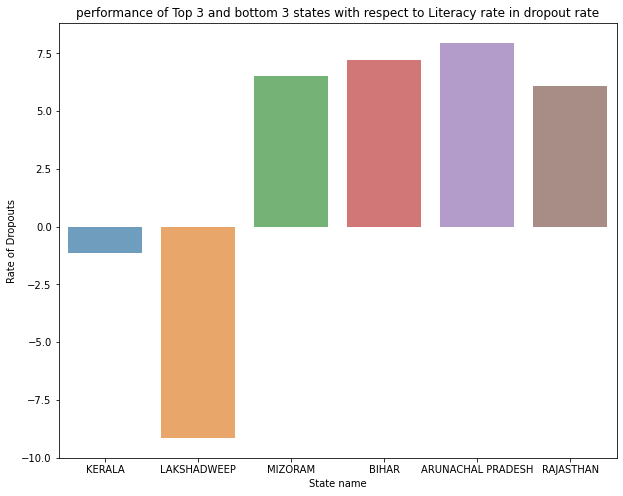

In [ ]:
#plotting performance of Top 3 and bottom 3 states with respect to Literacy rate in dropout rate
plt.figure(figsize=(10,8))
sns.barplot( top_bottom_LI['STATNAME'],top_bottom_LI['AVG_DROP_OUT'], alpha=0.7)
plt.title("performance of Top 3 and bottom 3 states with respect to Literacy rate in dropout rate")
plt.xlabel("State name")
plt.ylabel("Rate of Dropouts")